In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from kafka import KafkaProducer
import json
import joblib

# Load the dataset
data = pd.read_csv('PPN.csv')

# Filter data within desired range in the 'TPC' and 'Momento' columns
filtered_data = data[(data['TPC'] >= 0) & (data['TPC'] <= 700) & (data['Momento'] >= 0) & (data['Momento'] <= 5)]

# Select relevant columns (TPC and Momento) after filtering
X = filtered_data[['Momento', 'TPC']].values
y = filtered_data['Clase'].values  # Assuming 'particle_type' is the column with labels

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Put away the scaler after training
joblib.dump(scaler, 'scaler2.pkl')

#Load the scaler for preprocessing the new data set
scaler = joblib.load('scaler2.pkl')

# One-hot encode the labels
y_encoded = to_categorical(y, num_classes=5)  # Assuming 5 classes for particles

# Build the neural network model
model = Sequential([
    Dense(64, input_dim=X_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')  # 5 output neurons for 5 particle classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_scaled, y_encoded, epochs=20, batch_size=32, validation_split=0.2)

# Save the trained model
model.save('modelo_entrenado2.h5')

# Define Kafka producer
producer = KafkaProducer(bootstrap_servers='localhost:9092', value_serializer=lambda v: json.dumps(v).encode('utf-8'))

# Function to send data to Kafka
def send_to_kafka(particle_data):
    producer.send('particle_data', particle_data)

# Example of sending data
example_data = {'Momento': 1.2, 'TPC': 300}
send_to_kafka(example_data)

# Function to predict particle type from new data
def predict_particle(data):
    data_scaled = scaler.transform([data])
    prediction = model.predict(data_scaled)
    predicted_class = prediction.argmax(axis=1)
    return predicted_class

# Example of predicting from new data
new_data = [1.2, 500]  # Example new data
predicted_particle = predict_particle(new_data)
print(f"Predicted particle class: {predicted_particle}")


Epoch 1/20


C:\Users\estef\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3486/3486 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9304 - loss: 0.2799 - val_accuracy: 0.9701 - val_loss: 0.0717
Epoch 2/20
3486/3486 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9719 - loss: 0.0690 - val_accuracy: 0.9795 - val_loss: 0.0496
Epoch 3/20
3486/3486 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9840 - loss: 0.0436 - val_accuracy: 0.9897 - val_loss: 0.0325
Epoch 4/20
3486/3486 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9871 - loss: 0.0370 - val_accuracy: 0.9846 - val_loss: 0.0367
Epoch 5/20
3486/3486 ━━━━━━━━━━━━━━━━━━━━ 3s 996us/step - accuracy: 0.9880 - loss: 0.0309 - val_accuracy: 0.9904 - val_loss: 0.0245
Epoch 6/20
3486/3486 ━━━━━━━━━━━━━━━━━━━━ 3s 988us/step - accuracy: 0.9902 - loss: 0.0268 - val_accuracy: 0.9852 - val_loss: 0.0449
Epoch 7/20
3486/3486 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9901 - loss: 0.0270 - val_accuracy: 0.9905 - val_loss: 0.0284
Epoch 8/20
3486/3486 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9901 - loss: 0.0258 - val_acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted particle class: [2]


In [14]:
import pandas as pd
df = pd.read_csv("PPN.csv")
df

# Calculate the frequency of values in the column
frecuencia = df['Clase'].value_counts()

print(frecuencia)


4    98103
1    31159
2     6568
3     3584
0       12
Name: Clase, dtype: int64


In [15]:
import pandas as pd

# Load the data set
data = pd.read_csv('PPN.csv')

# Define replacement mapping
replacement_mapping = {
    0: 11,
    4: 3,
    1: 4,
    2: 5,
    3: 1
}

# Replace values in 'class' column
data['Clase'] = data['Clase'].replace(replacement_mapping)

# Save the updated DataFrame to a new CSV file
data.to_csv('PB-NEG.csv', index=False)

# Show the first rows of the updated DataFrame to verify
print(data.head())

# Calculate the frequency of values in the column
frecuencia = data['Clase'].value_counts()

print(frecuencia)

   Event  Particula        Px        Py        Pz        Vx        Vy  \
0      0          1  0.634449  0.571383  0.303386 -0.003215  0.170457   
1      0          4 -0.214709  1.045820  0.942502 -0.003146  0.170356   
2      0          5  1.299730  0.140749  0.992929 -0.003116  0.170248   
3      0          6 -2.029920 -1.891820  0.968150 -0.003132  0.170363   
4      0          7 -0.866463 -0.471645  0.297385 -0.003211  0.170510   

        Vz       ITS      TPC      TOF  Carga   Momento   VxEvent   VyEvent  \
0  2.83831  137.5000  89.8750  19715.2     -1  0.905362 -0.003129  0.170359   
1  2.83822   98.3125  63.3750  17153.2     -1  1.423830 -0.003129  0.170359   
2  2.83821   77.1250  61.3125  99999.0     -1  1.642130 -0.003129  0.170359   
3  2.83828   85.3750  71.6250  13005.2     -1  2.943370 -0.003129  0.170359   
4  2.83788  128.1250  82.9375  18202.4     -1  1.031290 -0.003129  0.170359   

   VzEvent  Clase  
0  2.83825      5  
1  2.83825      4  
2  2.83825      4  
3  2.8

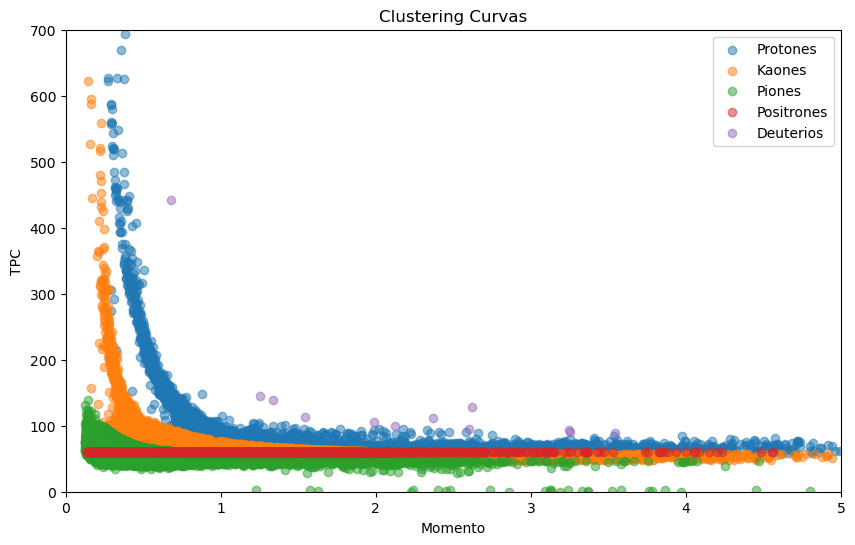

Visualización completa.


In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data set
data = pd.read_csv('PB-NEG.csv')
X=data
# Define mapping of cluster numbers to specific names
cluster_mapping = {
    1: 'Positrones',
    3: 'Piones',
    4: 'Kaones',
    5: 'Protones',
    11: 'Deuterios'
}

# Replace cluster numbers with friendly names
X['Cluster_Name'] = X['Clase'].map(cluster_mapping)

plt.figure(figsize=(10, 6))

# Plot each cluster with its descriptive name
for cluster_name in X['Cluster_Name'].unique():
    plt.scatter(X.loc[X['Cluster_Name'] == cluster_name, 'Momento'],
                X.loc[X['Cluster_Name'] == cluster_name, 'TPC'],
                alpha=0.5, label=cluster_name)

plt.title('Clustering Curvas')
plt.xlabel('Momento')
plt.ylabel('TPC')
plt.xlim(0, 5)  
plt.ylim(0, 700)  
plt.legend()
plt.show()

print("Visualización completa.")
